In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# 현재 폴더에 MNIST가 있음을 가정(경로 상에 이미 있는 경우 첫 번째 파라미터를 ""로)

mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                        target_transform=None, download=True) # train = True로 train data set을 불러온다
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                       target_transform=None, download=True) # train = False의 경우 test data set을 사용함을 의미

mnist_train 길이:  60000
mnist_test 길이:  10000
image data의 형태:  torch.Size([1, 28, 28])
label:  5


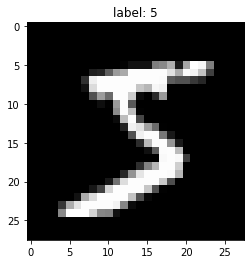

In [3]:
# train, test data set의 사이즈(길이)
print("mnist_train 길이: ", len(mnist_train))
print("mnist_test 길이: ", len(mnist_test))

# 데이터 하나에 대한 정보(형태, 레이블, 이미지)
image, label = mnist_train.__getitem__(0) # 0번째(제일 처음) 데이터
print("image data의 형태: ", image.size()) # data shape
print("label: ", label)

img = image.numpy() # 이미지 데이터를 출력하기 위해 넘파이로 변환한다. (1, 28, 28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [4]:
# 학습을 위한 파라미터(hyperparameter)
batch_size = 1024 # 데이터를 얼마나 묶어서 학습할지 정한다.
learning_rate = 0.01 # 경사 하강법의 학습률을 정한다
num_epoch = 400 # 전체 데이터 셋 학습 횟수를 정한다.

In [5]:
# train_loader, test_loader = train dataset의 전처리 과정 일부분이라 생각
# 배치 사이즈를 정해서 나누고, 데이터를 섞는 등의 처리과정을 거친다.
train_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True) # 전체 데이터셋을 1024로 나눈 후 나머지는 버린다.

test_loader = torch.utils.data.DataLoader(mnist_test,
                                         batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                         drop_last=True)  
# test_data를 섞으면 일정한 테스트 결과를 확인할 수 없으므로 False로 정한다.

[0]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


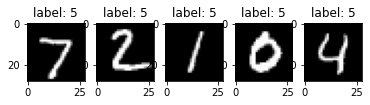

[1]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


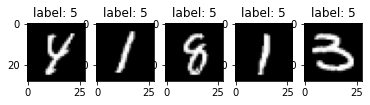

[2]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


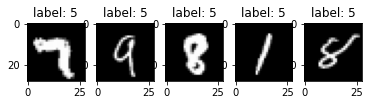

[3]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


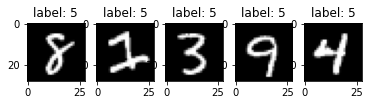

[4]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


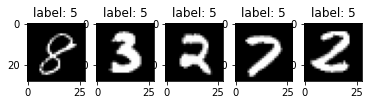

[5]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


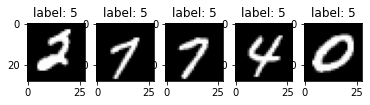

[6]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


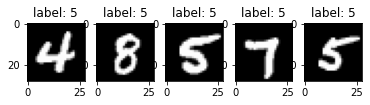

[7]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


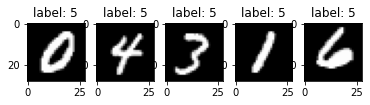

[8]
한 번에 로드되는 데이터 크기:  1024
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


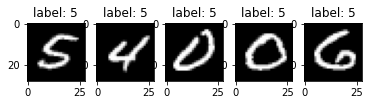

In [6]:
n = 5 # 한 회당 pyplot으로 그릴 데이터 샘플의 개수
for i, [imgs, labels] in enumerate(test_loader): # 한 번에 batch_size만큼의 (img, label) dataset을 꺼낸다. 
    if i>10: # i는 enumerate 함수의 결과값(반복문이 한 바퀴 돌면 i+1)
        break
    
    print("[%d]" %i)
    print("한 번에 로드되는 데이터 크기: ", len(imgs))
    
    # draw
    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2])) # (1, 28, 28) -> (28, 28)
        print(img.shape)
        
        plt.subplot(1, n, j+1) #(1, 3) shape을 가진 plot의 j번째 subplot에 그리겠다
        plt.imshow(img, cmap='gray')
        plt.title("label: %d"%label)
    plt.show()


In [7]:
# 모델 선언 (행렬곱과 비교)
# * 퍼셉트론(2 hidden layer) *
model = nn.Sequential( # 신경망의 pipeline 역할
    nn.Linear((28*28),256), # (256, 28*28) x (28*28, 1) -> (256, 1) # input -> h1
    nn.Sigmoid(), # nn.ReLU()도 있음, # sigmoid의 경우 91.89% 
    # nn.Linear(256, 256) # 히든 레이어 추가
    nn.Linear(256, 128), # (128, 256) x (256, 1) -> (128, 1) # h1 -> h2
    nn.Linear(128, 10), # (10, 128) x (128, 1) -> (10, 1) # h2 -> output
) # Linear : fully connected layer를 만들어라
# hidden layer를 조절(개수, 사이즈)하여 모델을 튜닝할 수 있다.

# 파라미터 보기
print(list(model.parameters())) # 모델의 초기 파라미터 출력

# gpu 사용 (nvidia)
# model = model.cuda()

[Parameter containing:
tensor([[-0.0119, -0.0139,  0.0040,  ...,  0.0207,  0.0133, -0.0070],
        [ 0.0018,  0.0273,  0.0059,  ..., -0.0211,  0.0153,  0.0242],
        [-0.0163,  0.0162,  0.0217,  ...,  0.0350,  0.0208, -0.0194],
        ...,
        [-0.0151, -0.0192, -0.0040,  ..., -0.0044, -0.0282, -0.0015],
        [-0.0009, -0.0253,  0.0041,  ..., -0.0264,  0.0038,  0.0035],
        [ 0.0215, -0.0235, -0.0207,  ...,  0.0201,  0.0238, -0.0248]],
       requires_grad=True), Parameter containing:
tensor([-0.0293, -0.0145,  0.0237, -0.0226, -0.0120, -0.0112,  0.0332, -0.0109,
        -0.0015, -0.0336, -0.0220, -0.0011, -0.0113, -0.0099, -0.0235,  0.0101,
         0.0156, -0.0219, -0.0206, -0.0234, -0.0044, -0.0113, -0.0310, -0.0080,
        -0.0139,  0.0080, -0.0150,  0.0094,  0.0077,  0.0297, -0.0236, -0.0111,
        -0.0250, -0.0171,  0.0221,  0.0213,  0.0276, -0.0203,  0.0301, -0.0049,
         0.0283,  0.0287, -0.0015, -0.0260,  0.0300, -0.0341,  0.0065, -0.0103,
         0.00

In [8]:
# 성능 예측 함수 정의

def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = imgs
        # print(img.shape) # (batch size, 1, 28, 28)
        label = Variable(labels) # 모델에 데이터를 넣을 때 Variable 함수를 써야 한다.
        # label = Variable(labels).cuda()
        
        # data를 학습할 수 있게 reshape한다 (1, 28, 28) ->(28*28)
        # (batch size, 1, 28, 28) -> (batch size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch size, 28, 28) -> (batch size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False) # requires_grad : 역전파 할거야?
        # img = Variable(img, requires_grad_False).cuda()
        
        output = imodel(img) # forward propagation # 모델에 '배치' 단위로 넣어준다 
        # output shape : (1024, 10), one hot encoding
        _, output_index = torch.max(output, 1) # 하나의 아웃풋마다의 최댓값이 가진 인덱스를 저장한다.(argmax->yhat)
        # max의 파라미터 : (data, axis) 
        #    => axis 방향의 최댓값을 찾고(axis=1인 경우 '열(가로)' 방향) shape을 1로 축소한다.
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
        print(total, correct) # 전체 데이터의 개수와 예측에 성공한 데이터 개수 출력
    
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [9]:
ComputeAccr(test_loader, model) 
# 테스트를 test_loader(test dataset)를 통해 진행한다.
# 이 클래스는 역전파를 하지 않고 forward propagation만 진행하여 현재 파라미터의 성능을 측정한다.

1024 tensor(166.)
2048 tensor(317.)
3072 tensor(459.)
4096 tensor(613.)
5120 tensor(772.)
6144 tensor(933.)
7168 tensor(1085.)
8192 tensor(1245.)
9216 tensor(1403.)
Accuracy of Test Data: 15.22352409362793


In [10]:
# loss function, Optimizer select

loss_func = nn.CrossEntropyLoss() # Classification의 cost function인 cross entropy를 사용한다.
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # SGD로 최적화한다.
# parameters에는 weight과 bias가 들어가있음, learning rate는 초기에 설정한 값을 넣는다.

In [11]:
# train

for i in range(num_epoch): # 초기 epoch를 400회로 설정해두었다.
    for j, [imgs, labels] in enumerate(train_loader): # test의 과정과 거의 비슷(ComputeAccr)
        img = imgs
        label = Variable(labels)
        
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2])) # (batch size, 28*28)
        img = Variable(img, requires_grad=True) # back propagation 실행
        
        optimizer.zero_grad() # gradient를 0으로 설정(초기화)
        output = model(img) # forward propagation (1024 * 10)
        loss = loss_func(output, label) # (1024, 10) size의 tensor가 data로(학습에 반영해야 함) 들어간다.
        
        # backprogation의 결과로 각 유닛의 gradient 값이 저장된다.
        loss.backward() # backpropagation을 간단하게 구현한다.
        # optimzer.step()을 통해 저장한 gradient를 통해 parameter(weight, bias)가 학습된다.
        optimizer.step()
       
        
    if i%50 == 0:
        print("epochs : %d" %i)
        ComputeAccr(test_loader, model)
        print (loss)
        
# 결과값을 보면, loss 함수와 성능 예측(측정) 함수의 metric은 다르다는 것을 알 수 있다.


epochs : 0
1024 tensor(130.)
2048 tensor(242.)
3072 tensor(348.)
4096 tensor(467.)
5120 tensor(586.)
6144 tensor(703.)
7168 tensor(811.)
8192 tensor(927.)
9216 tensor(1041.)
Accuracy of Test Data: 11.295573234558105
tensor(2.2973, grad_fn=<NllLossBackward>)
epochs : 50
1024 tensor(813.)
2048 tensor(1580.)
3072 tensor(2370.)
4096 tensor(3145.)
5120 tensor(3943.)
6144 tensor(4818.)
7168 tensor(5684.)
8192 tensor(6559.)
9216 tensor(7469.)
Accuracy of Test Data: 81.04383850097656
tensor(0.7429, grad_fn=<NllLossBackward>)
epochs : 100
1024 tensor(892.)
2048 tensor(1756.)
3072 tensor(2629.)
4096 tensor(3486.)
5120 tensor(4364.)
6144 tensor(5295.)
7168 tensor(6227.)
8192 tensor(7163.)
9216 tensor(8135.)
Accuracy of Test Data: 88.27040100097656
tensor(0.4144, grad_fn=<NllLossBackward>)
epochs : 150
1024 tensor(910.)
2048 tensor(1789.)
3072 tensor(2683.)
4096 tensor(3564.)
5120 tensor(4458.)
6144 tensor(5406.)
7168 tensor(6353.)
8192 tensor(7295.)
9216 tensor(8275.)
Accuracy of Test Data: 89.78

In [12]:
 # backpropagation으로 갱신한 모델을 테스트
ComputeAccr(test_loader, model) # 92.05%의 정확도, ReLU의 경우 92.48%가 나왔다고 합니다.

1024 tensor(935.)
2048 tensor(1832.)
3072 tensor(2765.)
4096 tensor(3686.)
5120 tensor(4606.)
6144 tensor(5566.)
7168 tensor(6530.)
8192 tensor(7495.)
9216 tensor(8482.)
Accuracy of Test Data: 92.03559112548828


In [13]:
# 학습된 파라미터를 저장해야 한다.(중간 데미지로 인한 작업 종료 -> 다시 시작해야 함.)

# netname = './nets/mlp_weight.pkl'
# torch.save(model, netname, )

# model = torch.load(netname)
# 안전장치로써 사용하기 위해 반복문을 통해 

In [14]:
# npz로 저장

# 1. parameter 보기
print(list(model.parameters()))

# 2. parameter 설정

param_list = list(model.parameters())

W1 = param_list[0].cpu().detach().numpy()
b1 = param_list[1].cpu().detach().numpy()

W2 = param_list[2].cpu().detach().numpy()
b2 = param_list[3].cpu().detach().numpy()

W3 = param_list[4].cpu().detach().numpy()
b3 = param_list[5].cpu().detach().numpy()
    
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

# 3. npz save
np.savez_compressed('./nets/mlp_weight.npz',
                   W1=W1, b1=b1,
                   W2=W2, b2=b2,
                   W3=W3, b3=b3)

# 4. test

weights = np.load('./nets/mlp_weight.npz')
W1 = weights['W1']
print (W1.shape)


[Parameter containing:
tensor([[-0.0119, -0.0139,  0.0040,  ...,  0.0207,  0.0133, -0.0070],
        [ 0.0018,  0.0273,  0.0059,  ..., -0.0211,  0.0153,  0.0242],
        [-0.0163,  0.0162,  0.0217,  ...,  0.0350,  0.0208, -0.0194],
        ...,
        [-0.0151, -0.0192, -0.0040,  ..., -0.0044, -0.0282, -0.0015],
        [-0.0009, -0.0253,  0.0041,  ..., -0.0264,  0.0038,  0.0035],
        [ 0.0215, -0.0235, -0.0207,  ...,  0.0201,  0.0238, -0.0248]],
       requires_grad=True), Parameter containing:
tensor([-3.1261e-02, -9.9947e-03,  2.3702e-02, -2.1783e-02, -8.2768e-03,
        -4.7253e-03,  2.2227e-02, -2.4504e-03,  2.2498e-03, -3.6488e-02,
        -1.6800e-02, -1.6358e-02, -1.2201e-02, -1.7536e-02, -1.8292e-02,
         1.6972e-02,  1.4446e-02, -1.6120e-02, -1.8992e-02, -2.0736e-02,
        -1.1701e-02, -3.1107e-03, -3.1723e-02, -1.0040e-02, -7.1084e-03,
         3.2927e-03, -7.0337e-03,  1.0334e-02,  2.4311e-02,  3.9317e-02,
        -2.6914e-04, -1.1895e-02, -1.9131e-02, -1.3798e